In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
loan = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan.shape

(39717, 111)

In [4]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#check for missing values
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [7]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

57

In [8]:
#drop column with more than 50% missing values
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

In [9]:
#check for missing values again
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [10]:
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique desc : %d"  % len(loan.desc.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique desc : 26528
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


In [11]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [13]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [14]:
loan.tax_liens.unique()

array([ 0., nan])

In [15]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [16]:
#collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens have only 0 and nan. So better to exclude this in analysis.
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', ]
loan = loan.drop(drop_columnlist,axis=1)

In [17]:
loan.shape

(39717, 51)

In [18]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]



emp_title                6.19
emp_length               2.71
desc                    32.58
title                    0.03
revol_util               0.13
last_pymnt_d             0.18
last_credit_pull_d       0.01
pub_rec_bankruptcies     1.75
dtype: float64

In [19]:
#lets remove desc as it has 32% data missing.
loan = loan.drop('desc',axis=1)

In [20]:
loan.shape

(39717, 50)

In [21]:
#lets relook at pub_rec_bankruptcies as it has 1.75% data missing
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [22]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
loan.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [24]:
loan.emp_title.value_counts()

US Army                       134
Bank of America               109
IBM                            66
AT&T                           59
Kaiser Permanente              56
                             ... 
Friedmans Home Improvement      1
Department of Defense OIG       1
Lawrence School District        1
morgan ashley studio salon      1
quality glass                   1
Name: emp_title, Length: 28820, dtype: int64

In [25]:
loan.emp_title.isnull().value_counts()

False    37258
True      2459
Name: emp_title, dtype: int64

In [26]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [27]:
loan.emp_length.isnull().value_counts()

False    38642
True      1075
Name: emp_length, dtype: int64

In [28]:
#2459 are missing emp title and 1075 are missing emp length
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [29]:
loan.shape

(37202, 50)

In [30]:
#recheck for missing values
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title                   0.02
revol_util              0.12
last_pymnt_d            0.17
pub_rec_bankruptcies    1.76
dtype: float64

In [31]:
#lets remove the rows with pub_rec_bankruptcies as missing
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [32]:
#recheck for missing values
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [33]:
#lets cleanup all rows with missing values
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [34]:
loan.shape

(36433, 50)

In [35]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.643300e+04,3.643300e+04,36433.000000,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.0,36433.0,36433.0,36433.000000
mean,6.909826e+05,8.610707e+05,11307.679851,11032.834244,10601.325781,326.186394,6.930522e+04,13.444131,0.146131,0.86493,...,9912.408471,2304.404937,1.299840,92.855490,11.677065,2742.955476,1.0,0.0,0.0,0.041418
std,2.026435e+05,2.538822e+05,7433.859357,7166.484281,7072.842604,207.389943,6.354244e+04,6.643308,0.492199,1.06343,...,7053.212865,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.0,0.0,0.0,0.200221
min,5.574200e+04,1.124930e+05,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.00000,...,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,1.0,0.0,0.0,0.000000
25%,5.226860e+05,6.755300e+05,5600.000000,5500.000000,5000.000000,168.900000,4.200000e+04,8.360000,0.000000,0.00000,...,4800.000000,678.010000,0.000000,0.000000,0.000000,226.280000,1.0,0.0,0.0,0.000000
50%,6.705630e+05,8.569510e+05,10000.000000,10000.000000,9202.846434,283.280000,6.000000e+04,13.540000,0.000000,1.00000,...,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,1.0,0.0,0.0,0.000000
75%,8.399030e+05,1.049791e+06,15000.000000,15000.000000,14508.454150,432.220000,8.300000e+04,18.690000,0.000000,1.00000,...,14000.000000,2891.860000,0.000000,0.000000,0.000000,3457.580000,1.0,0.0,0.0,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.00000,...,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


In [36]:
#recheck missing values now
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

In [37]:
#no missing values

In [38]:
#keep a backup of cleaned up data
loan.to_csv('loan_clean.csv', encoding='utf-8', index=False)

In [39]:
clean_loan = loan[:]

In [40]:
loan.shape

(36433, 50)

In [41]:
clean_loan.shape

(36433, 50)

In [42]:
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [43]:
loan.acc_now_delinq

1        0
3        0
4        0
5        0
6        0
        ..
39551    0
39562    0
39623    0
39666    0
39680    0
Name: acc_now_delinq, Length: 36433, dtype: int64

In [44]:
loan.application_type

1        INDIVIDUAL
3        INDIVIDUAL
4        INDIVIDUAL
5        INDIVIDUAL
6        INDIVIDUAL
            ...    
39551    INDIVIDUAL
39562    INDIVIDUAL
39623    INDIVIDUAL
39666    INDIVIDUAL
39680    INDIVIDUAL
Name: application_type, Length: 36433, dtype: object

In [45]:
loan.policy_code

1        1
3        1
4        1
5        1
6        1
        ..
39551    1
39562    1
39623    1
39666    1
39680    1
Name: policy_code, Length: 36433, dtype: int64

In [46]:
loan.initial_list_status

1        f
3        f
4        f
5        f
6        f
        ..
39551    f
39562    f
39623    f
39666    f
39680    f
Name: initial_list_status, Length: 36433, dtype: object

In [47]:
loan.delinq_amnt

1        0
3        0
4        0
5        0
6        0
        ..
39551    0
39562    0
39623    0
39666    0
39680    0
Name: delinq_amnt, Length: 36433, dtype: int64

In [48]:
loan.pymnt_plan

1        n
3        n
4        n
5        n
6        n
        ..
39551    n
39562    n
39623    n
39666    n
39680    n
Name: pymnt_plan, Length: 36433, dtype: object

In [49]:
#drop all the above columns we checked as it has same vlaue for all rows and wont help analysis.
columns_tobe_dropped = ['pymnt_plan', 'delinq_amnt', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq']
loan= loan.drop(columns_tobe_dropped,axis=1)

In [50]:
loan.shape


(36433, 44)

In [51]:
loan.id

1        1077430
3        1076863
4        1075358
5        1075269
6        1069639
          ...   
39551     158706
39562     154154
39623     132892
39666     119043
39680     112496
Name: id, Length: 36433, dtype: int64

In [52]:
loan.member_id

1        1314167
3        1277178
4        1311748
5        1311441
6        1304742
          ...   
39551     158450
39562     151536
39623     132889
39666     119040
39680     112493
Name: member_id, Length: 36433, dtype: int64

In [53]:
#drop id and member id as its a unique num for each customer, nothing to do with default.
columns_tobe_dropped = ['id', 'member_id']
loan= loan.drop(columns_tobe_dropped,axis=1)

In [54]:
loan.shape

(36433, 42)

In [55]:
loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

In [56]:
loan.url

1        https://lendingclub.com/browse/loanDetail.acti...
3        https://lendingclub.com/browse/loanDetail.acti...
4        https://lendingclub.com/browse/loanDetail.acti...
5        https://lendingclub.com/browse/loanDetail.acti...
6        https://lendingclub.com/browse/loanDetail.acti...
                               ...                        
39551    https://lendingclub.com/browse/loanDetail.acti...
39562    https://lendingclub.com/browse/loanDetail.acti...
39623    https://lendingclub.com/browse/loanDetail.acti...
39666    https://lendingclub.com/browse/loanDetail.acti...
39680    https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 36433, dtype: object

In [57]:
loan.zip_code

1        309xx
3        917xx
4        972xx
5        852xx
6        280xx
         ...  
39551    201xx
39562    226xx
39623    207xx
39666    201xx
39680    479xx
Name: zip_code, Length: 36433, dtype: object

In [58]:
#lets remove url and zip code as well
columns_tobe_dropped = ['url', 'zip_code']
loan= loan.drop(columns_tobe_dropped,axis=1)

In [59]:
loan.shape

(36433, 40)

In [60]:
#lets see if we can cleanup something more
loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc                  4924
total_rec_

In [61]:
loan.earliest_cr_line

1        Apr-99
3        Feb-96
4        Jan-96
5        Nov-04
6        Jul-05
          ...  
39551    Dec-00
39562    Mar-00
39623    Aug-97
39666    Nov-92
39680    Jul-00
Name: earliest_cr_line, Length: 36433, dtype: object

In [62]:
loan.dti

1         1.00
3        20.00
4        17.94
5        11.20
6        23.51
         ...  
39551     9.23
39562     7.51
39623     5.08
39666    13.50
39680     7.47
Name: dti, Length: 36433, dtype: float64

In [63]:
loan.funded_amnt

1         2500
3        10000
4         3000
5         5000
6         7000
         ...  
39551    12375
39562     4800
39623     9000
39666    15450
39680     3000
Name: funded_amnt, Length: 36433, dtype: int64

In [64]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [65]:
loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [66]:
#modify 10+ with 10 and < 1 with 0 and remove year
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan = loan.replace({"emp_length": emp_length_dict })

In [67]:
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [68]:
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [69]:
#remove months from here
loan['term'] = loan.term.apply(lambda x: x.split()[0])

In [70]:
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [71]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,Ryder,0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69%,67.79,B,B5,University Medical Group,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,A4,Veolia Transportaton,3,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60,15.96%,170.08,C,C5,Southern Star Photography,8,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [72]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')

In [73]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [74]:
loan.revol_util


1         9.40%
3           21%
4        53.90%
5        28.30%
6        85.60%
          ...  
39551    96.50%
39562    68.70%
39623    62.90%
39666    34.30%
39680    70.90%
Name: revol_util, Length: 36433, dtype: object

In [75]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,11032.834244,10601.325781,12.073862,326.186394,5.015645,6.930522e+04,13.444131,0.146131,0.86493,...,52.213313,12310.968657,11841.070656,9912.408471,2304.404937,1.299840,92.855490,11.677065,2742.955476,0.041418
std,7433.859357,7166.484281,7072.842604,3.734758,207.389943,3.542914,6.354244e+04,6.643308,0.492199,1.06343,...,378.443825,9048.420885,8911.319070,7053.212865,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.200221
min,500.000000,500.000000,0.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.00000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,5500.000000,5000.000000,9.320000,168.900000,2.000000,4.200000e+04,8.360000,0.000000,0.00000,...,0.000000,5672.557913,5413.410000,4800.000000,678.010000,0.000000,0.000000,0.000000,226.280000,0.000000
50%,10000.000000,10000.000000,9202.846434,11.860000,283.280000,4.000000,6.000000e+04,13.540000,0.000000,1.00000,...,0.000000,10101.589360,9632.040000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,15000.000000,14508.454150,14.650000,432.220000,9.000000,8.300000e+04,18.690000,0.000000,1.00000,...,0.000000,16700.719980,16094.490000,14000.000000,2891.860000,0.000000,0.000000,0.000000,3457.580000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.00000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [76]:
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [77]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,11032.834244,10601.325781,12.073862,326.186394,5.015645,6.930522e+04,13.444131,0.146131,0.86493,...,52.213313,12310.968657,11841.070656,9912.408471,2304.404937,1.299840,92.855490,11.677065,2742.955476,0.041418
std,7433.859357,7166.484281,7072.842604,3.734758,207.389943,3.542914,6.354244e+04,6.643308,0.492199,1.06343,...,378.443825,9048.420885,8911.319070,7053.212865,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.200221
min,500.000000,500.000000,0.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.00000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,5500.000000,5000.000000,9.320000,168.900000,2.000000,4.200000e+04,8.360000,0.000000,0.00000,...,0.000000,5672.557913,5413.410000,4800.000000,678.010000,0.000000,0.000000,0.000000,226.280000,0.000000
50%,10000.000000,10000.000000,9202.846434,11.860000,283.280000,4.000000,6.000000e+04,13.540000,0.000000,1.00000,...,0.000000,10101.589360,9632.040000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,15000.000000,14508.454150,14.650000,432.220000,9.000000,8.300000e+04,18.690000,0.000000,1.00000,...,0.000000,16700.719980,16094.490000,14000.000000,2891.860000,0.000000,0.000000,0.000000,3457.580000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.00000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [78]:
loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc                  4924
total_rec_

In [79]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,12375,1000.0,36,10.91,404.62,C,C3,Fullmoon Software,2,...,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,4800,4800,1100.0,36,10.28,155.52,C,C1,E.E. Wine Inc,1,...,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,9000,9000,700.0,36,12.49,301.04,D,D3,Maximus,8,...,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,15450,15450,600.0,36,11.22,507.46,C,C4,ARIN,2,...,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


In [80]:
loan.earliest_cr_line

1        Apr-99
3        Feb-96
4        Jan-96
5        Nov-04
6        Jul-05
          ...  
39551    Dec-00
39562    Mar-00
39623    Aug-97
39666    Nov-92
39680    Jul-00
Name: earliest_cr_line, Length: 36433, dtype: object

In [81]:
loan.issue_d

1        Dec-11
3        Dec-11
4        Dec-11
5        Dec-11
6        Dec-11
          ...  
39551    Dec-07
39562    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 36433, dtype: object

In [82]:
loan.last_pymnt_d

1        Apr-13
3        Jan-15
4        May-16
5        Jan-15
6        May-16
          ...  
39551    Feb-10
39562    Aug-08
39623    May-08
39666    Oct-09
39680    Aug-10
Name: last_pymnt_d, Length: 36433, dtype: object

In [83]:
loan.last_credit_pull_d

1        Sep-13
3        Apr-16
4        May-16
5        Jan-16
6        May-16
          ...  
39551    May-14
39562    Aug-08
39623    May-16
39666    Mar-10
39680    Jul-10
Name: last_credit_pull_d, Length: 36433, dtype: object

In [84]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [85]:
#converting to date time format
loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

In [86]:
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [87]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [88]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

In [89]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
count,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,11032.834244,10601.325781,12.073862,326.186394,5.015645,6.930522e+04,13.444131,0.146131,0.86493,...,2304.404937,1.299840,92.855490,11.677065,2742.955476,0.041418,6.897318,1996.910603,7.210606,2010.373535
std,7433.859357,7166.484281,7072.842604,3.734758,207.389943,3.542914,6.354244e+04,6.643308,0.492199,1.06343,...,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.200221,3.542471,6.940984,3.357084,0.807599
min,500.000000,500.000000,0.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.00000,...,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000,1969.000000,1.000000,2007.000000
25%,5600.000000,5500.000000,5000.000000,9.320000,168.900000,2.000000,4.200000e+04,8.360000,0.000000,0.00000,...,678.010000,0.000000,0.000000,0.000000,226.280000,0.000000,4.000000,1994.000000,4.000000,2010.000000
50%,10000.000000,10000.000000,9202.846434,11.860000,283.280000,4.000000,6.000000e+04,13.540000,0.000000,1.00000,...,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000,7.000000,1998.000000,7.000000,2011.000000
75%,15000.000000,15000.000000,14508.454150,14.650000,432.220000,9.000000,8.300000e+04,18.690000,0.000000,1.00000,...,2891.860000,0.000000,0.000000,0.000000,3457.580000,0.000000,10.000000,2001.000000,10.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.00000,...,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,12.000000,2068.000000,12.000000,2011.000000


In [90]:
loan.to_csv('loan_ready_for_analysis.csv', encoding='utf-8', index=False)

In [91]:
loan.shape

(36433, 44)

In [92]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [93]:
#Since we need to understand differences in the features between loans that have been fully paid or charged off.
#Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]

In [94]:
loan.shape

(35367, 44)

In [95]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [96]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [97]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [98]:
#This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (loan.loc[loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    f
    showLabels(ax)

In [99]:
(loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: grade, dtype: float64

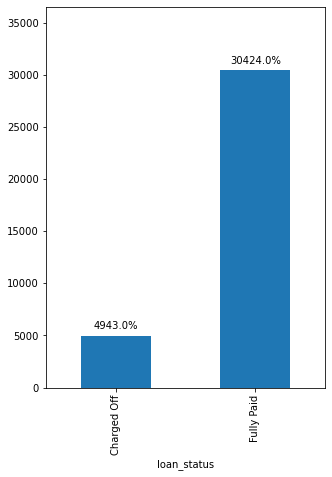

In [100]:
plt.figure(figsize=(5,7))
ax = loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [101]:
print("%.2f" % (loan.loc[loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan)))

13.98


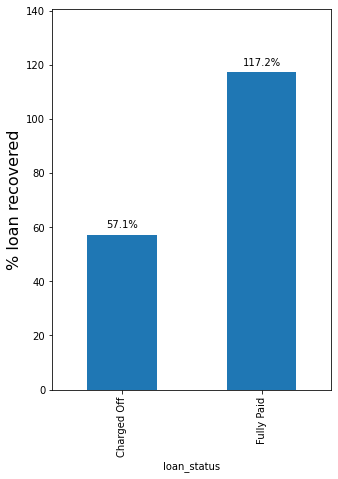

In [102]:
#Approximately 14% of loans in the dataset are defaulted.
#looking into loan recovered now.
plt.figure(figsize=(5,7))
ax = (loan.groupby('loan_status').total_pymnt.sum() * 100 / loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

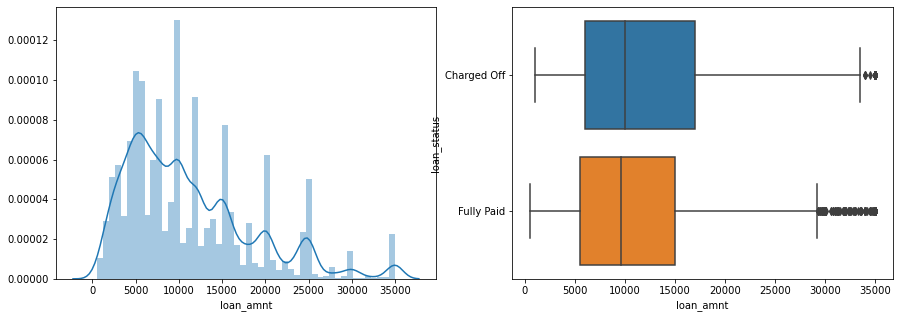

In [103]:
#Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit.
plot_distribution(loan, 'loan_amnt')

In [104]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


In [105]:

#Observation:

#Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
#Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.
#Charged off loans are shifted towards higher average loan amount request.


In [106]:
#Create Derived categorical variable
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


<ipython-input-106-1b5f75bd2075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'],


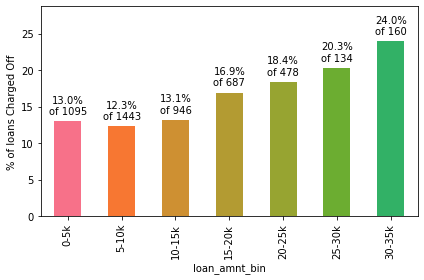

In [107]:
plotLoanStatus(loan, 'loan_amnt_bin')

In [108]:
#The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. 
#The higher loans, though lesser in number, carry a substantially higher risk of default.

In [109]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

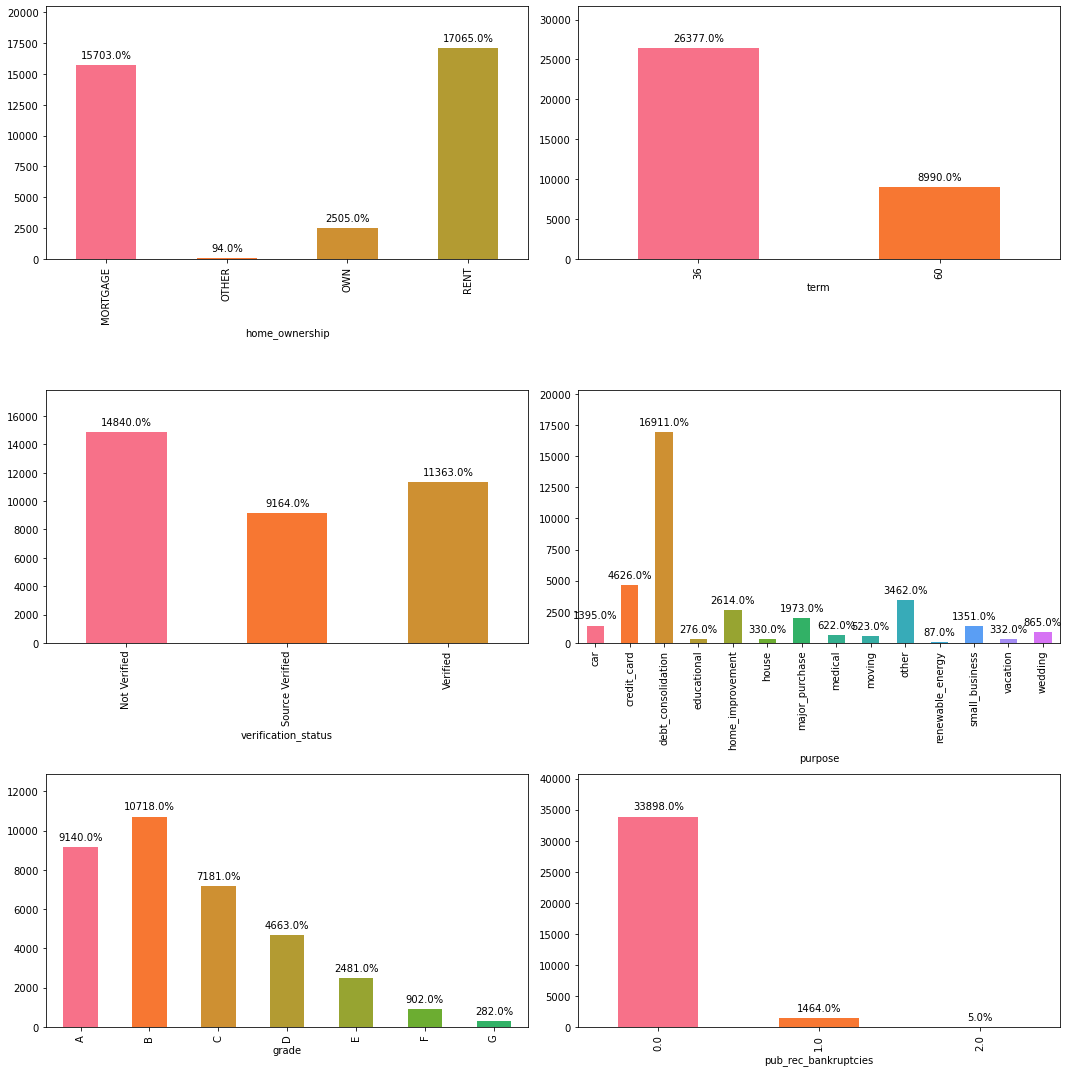

In [110]:
plt.figure(figsize=(15,15))

categoricalBarPlots(loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

In [111]:
#Most loans are for 36 month term
#Very few loans are extended to people with prior record of bankruptcy
#debt_consolidation is by far the largest 'purpose' for seeking a loan
#Most approved loans are high grade
#We should investigate the frequencies of defaults by term, purpose and prior record of bankruptcy

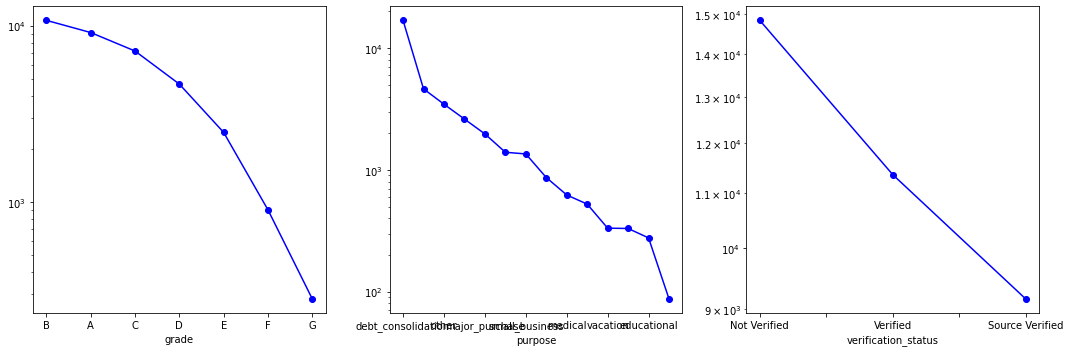

In [112]:
#Let's see if some of these variables follow the famous power law.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

In [113]:
#purpose and verification_status follow the power law

NameError: name 'f' is not defined

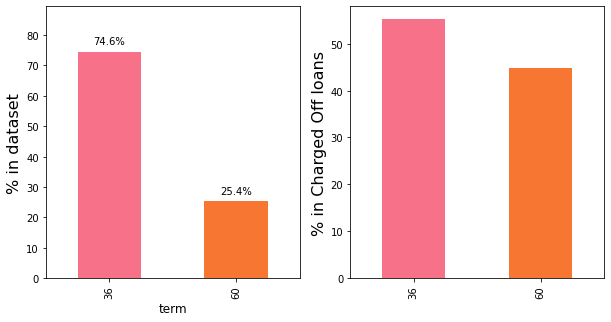

In [114]:
plt.figure(figsize=(10,5))
plot_percentages(loan, 'term')

In [ ]:
#Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
#Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.

NameError: name 'f' is not defined

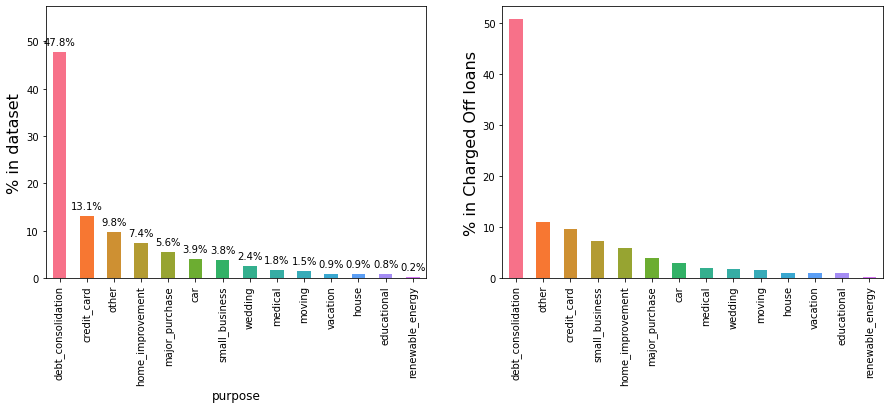

In [115]:
plt.figure(figsize=(15,5))
plot_percentages(loan, 'purpose')

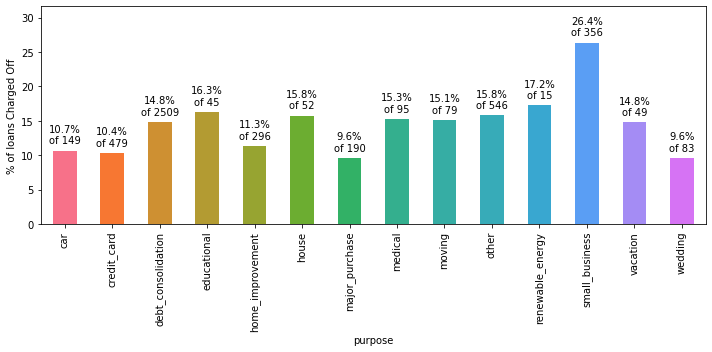

In [116]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loan, 'purpose')

In [ ]:
#26% of loans for small business are Charged Off. Making them the most risky purpose.
#Approximately ~49% of the loans are issued for the purpose of dept consolidation.
#17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

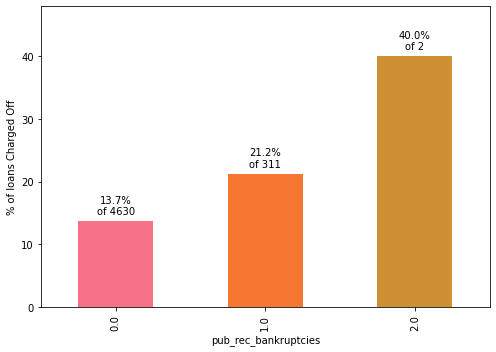

In [117]:
plt.figure(figsize=(7,5))
plotLoanStatus(loan, 'pub_rec_bankruptcies')

In [ ]:
loan.int_rate.describe()